## Churn pre-processing

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('churn_data_full.csv')

In [3]:
df.head()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Category,Churn Reason,Churn Score,City,CLTV,Contract,Country,...,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code,Churn
0,39,29,18.91,NaN,NaN,54,Bradley,3334,One Year,United States,...,7,477.05,0,132.37,0.0,609.42,0,1,93426,0
1,75,22,33.48,NaN,NaN,54,Lakeshore,2455,Month-to-Month,United States,...,30,3181.80,0,1004.40,0.0,4186.20,0,1,93634,0
2,67,14,9.96,NaN,NaN,26,Lompoc,5011,Two Year,United States,...,71,7904.25,0,707.16,0.0,8611.41,0,1,93437,0
3,47,7,34.64,NaN,NaN,29,Echo Lake,2452,Month-to-Month,United States,...,9,593.85,0,311.76,0.0,905.61,0,1,95721,0
4,21,0,10.49,NaN,NaN,23,Lancaster,4129,One Year,United States,...,25,507.90,0,262.25,0.0,770.15,1,0,93536,0


In [4]:
df.dtypes

Age                                    int64
Avg Monthly GB Download                int64
Avg Monthly Long Distance Charges    float64
Churn Category                        object
Churn Reason                          object
Churn Score                            int64
City                                  object
CLTV                                   int64
Contract                              object
Country                               object
Customer ID                           object
Customer Status                       object
Dependents                             int64
Device Protection Plan                 int64
Gender                                object
Internet Service                       int64
Internet Type                         object
Lat Long                              object
Latitude                             float64
Longitude                            float64
Married                                int64
Monthly Charge                       float64
Multiple L

In [5]:
missing_counts = df.isna().sum()
missing_percent = df.isna().mean().mul(100).round(2)

missing_df = pd.concat(
    [missing_counts, missing_percent],
    axis=1,
    keys=['Columns with missing Values', 'Missing %']
)

missing_df = missing_df.sort_values('Columns with missing Values', ascending=False)

pd.set_option('display.max_rows', None)

missing_df

,Columns with missing Values,Missing %
Churn Category,5174,73.46
Churn Reason,5174,73.46
Offer,3877,55.05
Internet Type,1526,21.67
Age,0,0.00
Streaming Movies,0,0.00
Payment Method,0,0.00
Phone Service,0,0.00
Population,0,0.00
Premium Tech Support,0,0.00


In [6]:
df['Refunds Awarded'] = np.where(df['Total Refunds'] > 0, 1, 0)

In [7]:
df['Internet Type'] = df['Internet Type'].fillna('None')

In [8]:
df['Monthly charge/CLTV'] = df['Monthly Charge'] / df['CLTV']

In [9]:
phone_bundle_services = ['Phone Service','Multiple Lines','Premium Tech Support','Device Protection Plan']
df['Phone_Bundle'] = df[phone_bundle_services].sum(axis=1) >= 4
df['Phone_Bundle'] = df['Phone_Bundle'].astype(int)

In [10]:
internet_bundle_services = ['Online Backup','Online Security','Streaming TV','Streaming Music','Streaming Movies']

In [11]:
all_service_columns = phone_bundle_services + internet_bundle_services
df['Total_Services_Used'] = df[all_service_columns].sum(axis=1)

In [12]:
df['Service_Level'] = pd.cut(df['Total_Services_Used'], bins=[-1, 3, 5, 10], labels=['Low', 'Medium', 'High'])
df['Service_Level'] = df['Service_Level'].astype('object')

In [13]:
drop_customer = ['Customer ID','Customer Status','Country','City','State','Zip Code','Lat Long','Latitude','Longitude','Dependents','Under 30','Senior Citizen','Married','Referred a Friend']

In [14]:
drop_contract= ['Offer','Payment Method','Total_Services_Used']

In [15]:
drop_financial = ['Total Charges','Total Refunds','Total Revenue','CLTV','Monthly Charge','Total Long Distance Charges']

In [16]:
drop_usage = ['Number of Referrals']

In [17]:
drop_churn_info = ['Churn Category','Churn Reason','Churn Score']

In [18]:
drop_time = ['Quarter']

In [19]:
complete_drop = drop_customer + drop_contract + drop_financial + drop_usage + drop_churn_info + drop_time

In [20]:
df_clean = df.drop(columns=complete_drop)

In [21]:
df_clean.head()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Contract,Device Protection Plan,Gender,Internet Service,Internet Type,Multiple Lines,Number of Dependents,...,Streaming Music,Streaming TV,Tenure in Months,Total Extra Data Charges,Unlimited Data,Churn,Refunds Awarded,Monthly charge/CLTV,Phone_Bundle,Service_Level
0,39,29,18.91,One Year,1,Female,1,DSL,0,3,...,0,1,7,0,1,0,0,0.020831,0,Medium
1,75,22,33.48,Month-to-Month,1,Male,1,Fiber Optic,1,0,...,0,1,30,0,1,0,0,0.043055,1,High
2,67,14,9.96,Two Year,1,Female,1,Fiber Optic,0,0,...,1,1,71,0,1,0,0,0.021892,0,High
3,47,7,34.64,Month-to-Month,0,Male,1,DSL,0,0,...,0,1,9,0,1,0,0,0.028120,0,Medium
4,21,0,10.49,One Year,0,Female,0,None,0,0,...,0,0,25,0,0,0,0,0.004892,0,Low


In [22]:
df_clean['Contract'].unique()

array(['One Year', 'Month-to-Month', 'Two Year'], dtype=object)

In [23]:
df_clean['Internet Type'].unique()

array(['DSL', 'Fiber Optic', 'None', 'Cable'], dtype=object)

In [24]:
df_clean['Service_Level'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [25]:
df_clean.dtypes

Age                                    int64
Avg Monthly GB Download                int64
Avg Monthly Long Distance Charges    float64
Contract                              object
Device Protection Plan                 int64
Gender                                object
Internet Service                       int64
Internet Type                         object
Multiple Lines                         int64
Number of Dependents                   int64
Online Backup                          int64
Online Security                        int64
Paperless Billing                      int64
Partner                                int64
Phone Service                          int64
Population                             int64
Premium Tech Support                   int64
Satisfaction Score                     int64
Streaming Movies                       int64
Streaming Music                        int64
Streaming TV                           int64
Tenure in Months                       int64
Total Extr

In [26]:
df_clean.isna().sum().sum()

0

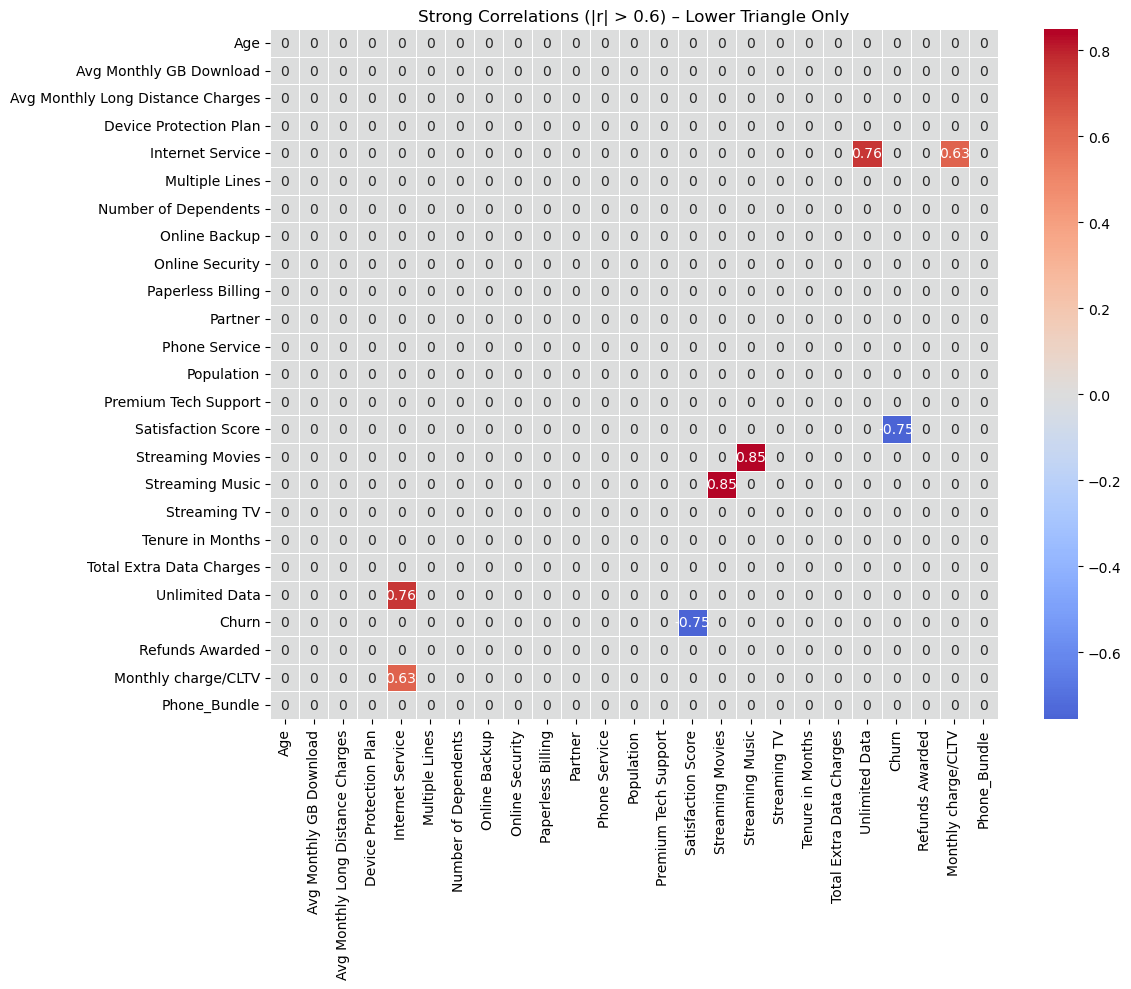

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_clean.corr(numeric_only=True)

filtered_corr = corr.copy()
filtered_corr[(corr.abs() <= 0.6) | (corr == 1.0)] = 0

mask = np.triu(np.ones_like(filtered_corr, dtype=bool))

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Strong Correlations (|r| > 0.6) – Lower Triangle Only")
plt.tight_layout()
plt.show()

In [28]:
df_clean['Partner'].unique()

array([1, 0])

In [29]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [30]:
features = df_clean.drop(columns=['Churn'])

binary_cols = [col for col in features.columns 
               if df[col].nunique() == 2 and df[col].dropna().isin([0, 1]).all()]

explicitly_categorical = ['Gender', 'Contract', 'Internet Type', 'Service_Level']
binary_cols = [col for col in binary_cols if col not in explicitly_categorical]

numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in binary_cols + ['Churn']]

In [31]:
categorical_ohe = ['Gender']
ordinal_contract = ['Contract']
ordinal_internet = ['Internet Type']
ordinal_service_level = ['Service_Level']

In [32]:
contract_order = [['Month-to-Month', 'One Year', 'Two Year']]
internet_order = [['None', 'DSL', 'Cable', 'Fiber Optic']]
service_order = [['Low', 'Medium', 'High']]

In [33]:
preprocessor = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_ohe),
    ('contract_ord', OrdinalEncoder(categories=contract_order), ordinal_contract),
    ('internet_ord', OrdinalEncoder(categories=internet_order), ordinal_internet),
    ('service_ord', OrdinalEncoder(categories=service_order), ordinal_service_level),
    ('scaler', StandardScaler(), numeric_cols)
])

In [34]:
X = df_clean.drop(columns=['Churn'])
y = df_clean['Churn']

In [35]:
X_transformed = preprocessor.fit_transform(X)